In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import g

In [64]:
df = pd.read_excel("data/gunn-kinzer-raindrop-velocity-small.xlsx")
df.head()

,diameter [cm],velocity [cm/sec],Mass [micrograms]
0,0.002,1.197,0.00418
1,0.004,4.730,0.03340
2,0.006,10.300,0.11300
3,0.008,17.400,0.26700
4,0.010,25.400,0.52400


The density of air is $\rho = 1.2041 kg/m^3$ at a standard atmospheric pressure of $101.325$ $kPa$ and at 20°C. This value can vary based on temperature, pressure, and humidity levels. 

At 20°C with the same atmospheric pressure of 101.325 kPa, the viscosity of air is about $1.81 \times 10^{-5} Pa \cdot s$. This value also changes based on the temperature and pressure. 

The equation for the Reynolds number is as follows:
$$
Re = \frac{\rho_{air} v l}{\mu_{air}}
$$

Diameter here will be used as the characteristic length.

In [65]:
# Constants
RHO_AIR = 1.2041  # density of air in kg/m³
MU_AIR = 1.81e-5  # dynamic viscosity of air in Pa·s (or kg/(m·s))

# Convert diameter and velocity from cm and cm/s to m and m/s
df['diameter [m]'] = df['diameter [cm]'] / 100
df['velocity [m/sec]'] = df['velocity [cm/sec]'] / 100

# Calculate Reynolds number for each raindrop
df['Reynolds'] = (RHO_AIR * df['velocity [m/sec]'] * df['diameter [m]']) / MU_AIR

# Find the Reynolds number for the smallest and largest raindrops
velocity_smallest = df["velocity [cm/sec]"].min()
velocity_largest = df["velocity [cm/sec]"].max()
diameter_smallest = df["diameter [cm]"].min()
diameter_largest = df["diameter [cm]"].max()
reynolds_smallest = df['Reynolds'].min()
reynolds_largest = df['Reynolds'].max()

print(f"Smallest velocity: {velocity_smallest} cm/sec")
print(f"Smallest length: {diameter_smallest} cm")
print(f"Smallest Reynolds Number : {reynolds_smallest}")
print(f"Largest velocity: {velocity_largest} cm/sec")
print(f"Largest length: {diameter_largest} cm")
print(f"Largest Reynolds Number: {reynolds_largest}")

Smallest velocity: 1.197 cm/sec
Smallest length: 0.002 cm
Smallest Reynolds Number : 0.01592605193370166
Largest velocity: 806.0 cm/sec
Largest length: 0.3 cm
Largest Reynolds Number: 1608.5711602209944


![Real Raindrops](images/real_raindrops.png)

Source: https://sciencenotes.org/the-real-raindrop-shape-is-not-a-teardrop/

## 3: Small Reynolds Number

$$
F_g = \frac{4}{3} \pi r^3 \rho_{water} g \\
F_D = k_1 \mu v d
$$


Given the following quantities above, because raindrops reached terminal velocity, acceleration equals zero due to the equillibrium state of the droplets, so $F_g = F_D$.

$$
F_g = F_d \\
\implies v = \frac{\pi \rho g}{6 k_1 \mu} \cdot d^2
$$

In [66]:
from sklearn.linear_model import LinearRegression

# Constants
RHO_WATER = 1000  # density of water in kg/m³ (assuming raindrops are water)

# Select the first three data points for small Reynolds numbers
small_Re_data = df.head(3)

# Prepare the data for linear regression (X: D^2, y: v)
X = (small_Re_data['diameter [m]']) ** 2
y = small_Re_data['velocity [m/sec]']

# Reshape X for sklearn
X_reshaped = X.values.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(X_reshaped, y)

# Extract the coefficient (slope)
slope = model.coef_[0]

# Calculate k1 from the slope
k1 = (np.pi * RHO_WATER * g) / (6 * slope * MU_AIR)

print(f"k1: {k1}")

k1: 9.993945872046686


In [67]:
print(g)

9.80665


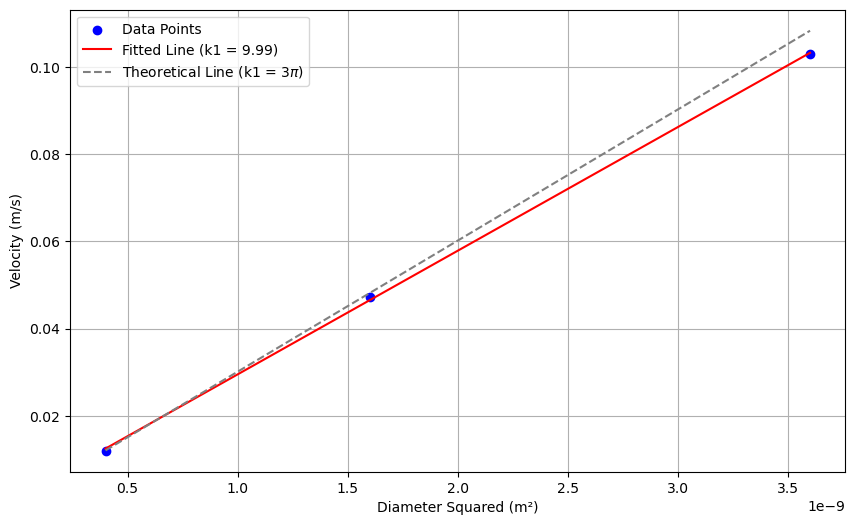

In [68]:
# Generate a range of D^2 values for plotting the fitted line
D_squared_range = np.linspace(X.min(), X.max(), 100)
v_predicted = model.predict(D_squared_range.reshape(-1, 1))

theory_slope = (RHO_WATER * g) / (6 * 3 * MU_AIR)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(D_squared_range, v_predicted, color='red', label=f'Fitted Line (k1 = {k1:.2f})')
plt.plot(D_squared_range, theory_slope * D_squared_range, color='gray', linestyle="--", label=r'Theoretical Line (k1 = 3$\pi$)')
plt.xlabel('Diameter Squared (m²)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/terminal_velocity_diameter_squared_small_droplets.png")
plt.show()

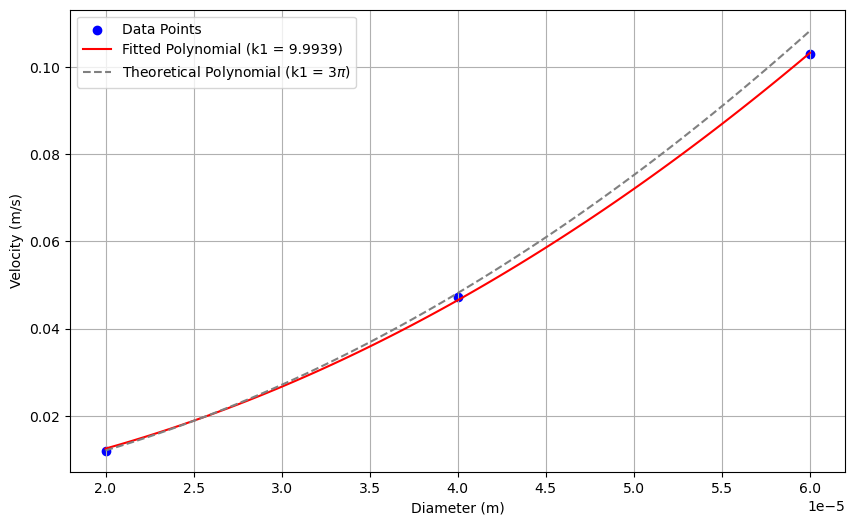

In [69]:
# Generate a range of D^2 values for plotting the fitted line
D_squared_range = np.linspace(X.min(), X.max(), 100)
v_predicted = model.predict(D_squared_range.reshape(-1, 1))

theory_slope = (RHO_WATER * g) / (6 * 3 * MU_AIR)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(X), y, color='blue', label='Data Points')
plt.plot(np.sqrt(D_squared_range), v_predicted, color='red', label=f'Fitted Polynomial (k1 = {k1:.4f})')
plt.plot(np.sqrt(D_squared_range), theory_slope * D_squared_range, color='gray', linestyle="--", label=r'Theoretical Polynomial (k1 = 3$\pi$)')
plt.xlabel('Diameter (m)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/terminal_velocity_diameter_small_droplets.png")
plt.show()

https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/Stokes_Law.htm

$$
F_D = F_D \\
\implies 6 \pi \mu_{air} r v = k_1 \mu_{air} d v \\
\implies 6 \pi \mu_{air} (\frac{d}{2}) v = k_1 \mu_{air} d v \\
\implies 3 \pi \mu d v = k_1 \mu d v \\
k_1 = 3 \pi \approx 9.425
$$

This approax through Stokes Law yields a similar $k_1$. 

In [70]:
error_small_reynolds = (3 * np.pi - k1) * 100 / (3 * np.pi)
print(f"Small Reynolds Number relative error: {error_small_reynolds}%")

Small Reynolds Number relative error: -6.039059101938174%


The relative error in the theoretical value of $k_1$ through applying force balance equations and Stokes Law versus the measured value of $k_1$ is $-6.039 \%$. This error is small but plays a much stronger, can be attributed to multiple factors. 

This slope error causes the absolute magnitude of the errors, however, to increase at a power of 2 as diameters increase. 

In [71]:
df.head()

,diameter [cm],velocity [cm/sec],Mass [micrograms],diameter [m],velocity [m/sec],Reynolds
0,0.002,1.197,0.00418,0.00002,0.01197,0.015926
1,0.004,4.730,0.03340,0.00004,0.04730,0.125865
2,0.006,10.300,0.11300,0.00006,0.10300,0.411124
3,0.008,17.400,0.26700,0.00008,0.17400,0.926026
4,0.010,25.400,0.52400,0.00010,0.25400,1.689731


## 4: Large Reynolds Number

In [72]:
# Select the first three data points for small Reynolds numbers
large_Re_data = df.tail(3)

# Prepare the data for linear regression (X: D^2, y: v)
X = large_Re_data['diameter [m]']
y = (large_Re_data['velocity [m/sec]']) ** 2

# Reshape X for sklearn
X_reshaped = X.values.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(X_reshaped, y)

# Extract the coefficient (slope)
slope = model.coef_[0]

# Calculate k1 from the slope
k2 = (np.pi * RHO_WATER * g) / (6 * slope * RHO_AIR)

print(f"k2: {k2}")

k2: 0.22272125995085335


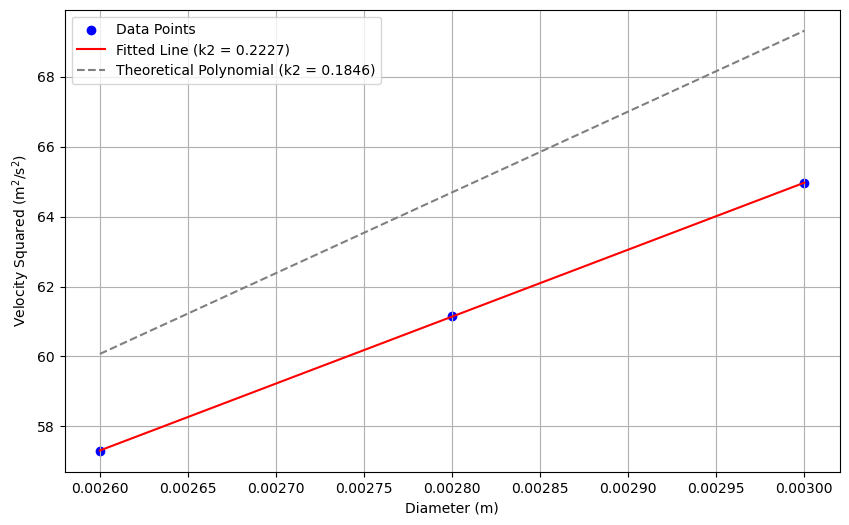

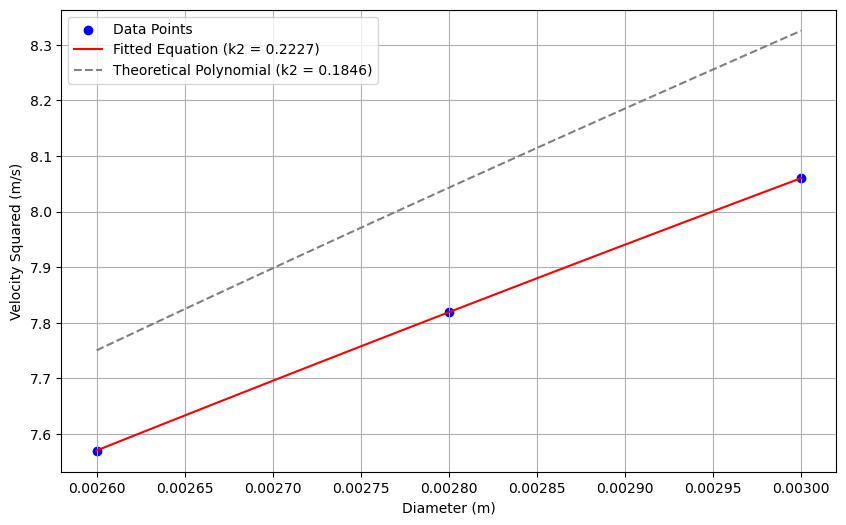

In [80]:
# Generate a range of D values for plotting the fitted line to v^2
D_range = np.linspace(X.min(), X.max())
v_squared_predicted = model.predict(D_range.reshape(-1, 1))

# Theoretical slope
theory_slope = np.pi * RHO_WATER * g / (6 * ((np.pi / 8) * 0.47) * RHO_AIR)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(D_range, v_squared_predicted, color='red', label=f'Fitted Line (k2 = {k2:.4f})')
plt.plot(D_range, theory_slope * D_range, color='gray', linestyle="--", label=r'Theoretical Polynomial (k2 = 0.1846)')
plt.xlabel('Diameter (m)')
plt.ylabel(r'Velocity Squared (m$^2$/s$^2$)')
plt.legend()
plt.grid(True)
plt.savefig("plots/terminal_velocity_diameter_large_droplets.png")
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, np.sqrt(y), color='blue', label='Data Points')
plt.plot(D_range, np.sqrt(v_squared_predicted), color='red', label=f'Fitted Equation (k2 = {k2:.4f})')
plt.plot(D_range, np.sqrt(theory_slope * D_range), color='gray', linestyle="--", label=r'Theoretical Polynomial (k2 = 0.1846)')
plt.xlabel('Diameter (m)')
plt.ylabel('Velocity Squared (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/terminal_velocity_diameter_sqrt_large_droplets.png")
plt.show()

In [81]:
error_large_reynolds = (((np.pi / 8) * 0.47) - k2) * 100 / ((np.pi / 8) * 0.47)
print(f"Large Reynolds Number relative error: {error_large_reynolds}%")

Large Reynolds Number relative error: -20.671283243687817%


## 4: Intermediate Values

$$
C_d \approx \frac{24}{Re} + \frac{3e^{-0.002 Re}}{(Re)^{0.4}} + 0.47
$$

http://www.thermopedia.com/content/707/

In [84]:
from scipy.optimize import fsolve

# Function to calculate the drag coefficient Cd based on the empirical formula
def calc_Cd(Re):
    return 24 / Re + 3 * np.exp(-0.002 * Re) / (Re**0.4) + 0.47

# Function to be used in the root-finding process, representing the force balance
def force_balance(v, d, rho_air, rho_water, g):
    A = np.pi * (d / 2)**2  # Cross-sectional area of the droplet
    Re = rho_air * v * d / MU_AIR  # Reynolds number
    Cd = calc_Cd(Re)  # Drag coefficient based on empirical formula
    Fd = 0.5 * Cd * rho_air * v**2 * A  # Drag force
    Fg = (4 / 3) * np.pi * (d / 2)**3 * rho_water * g  # Gravitational force
    return Fd - Fg  # Force balance equation

# Terminal velocity predictions using fsolve for each droplet size in the dataset
df['terminal_velocity_empirical'] = df['diameter [m]'].apply(
    lambda d: fsolve(force_balance, 0.1, args=(d, RHO_AIR, RHO_WATER, g))[0]
)

# Display the first few rows of the dataframe to see the calculated terminal velocities
df.head()

,diameter [cm],velocity [cm/sec],Mass [micrograms],diameter [m],velocity [m/sec],Reynolds,terminal_velocity_empirical
0,0.002,1.197,0.00418,0.00002,0.01197,0.015926,0.011913
1,0.004,4.730,0.03340,0.00004,0.04730,0.125865,0.046395
2,0.006,10.300,0.11300,0.00006,0.10300,0.411124,0.100337
3,0.008,17.400,0.26700,0.00008,0.17400,0.926026,0.169717
4,0.010,25.400,0.52400,0.00010,0.25400,1.689731,0.250447


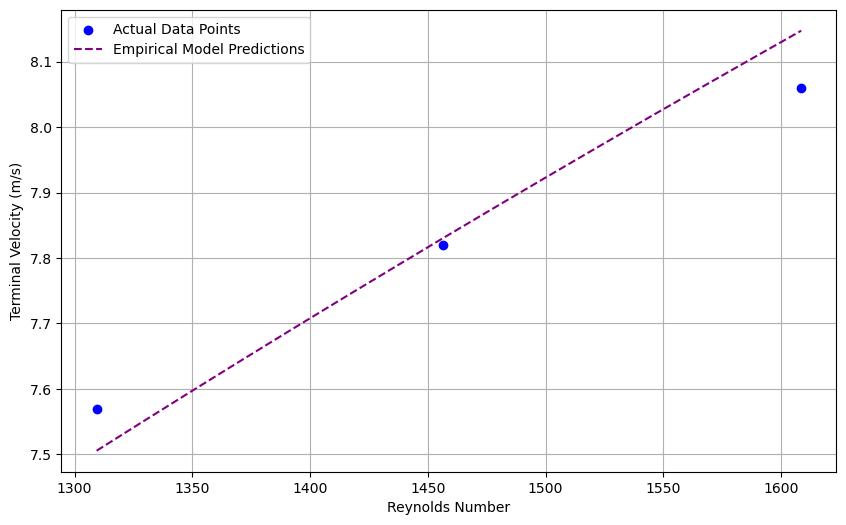

In [97]:
# Select the last three data points for large Reynolds numbers comparison
large_Re_data_empirical = df.tail(3)

# v^2 prediction
D_range = np.linspace(X.min(), X.max(), 500)
v_squared_predicted = model.predict(D_range.reshape(-1, 1))

# Range of data
data_range = np.linspace(large_Re_data_empirical['Reynolds'].min(), large_Re_data_empirical['Reynolds'].max(), 500)
diameter_range_new = np.linspace(
    large_Re_data_empirical["diameter [m]"].min(),
    large_Re_data_empirical["diameter [m]"].max(),
    500,
)
diameter_range_new = pd.Series(diameter_range_new)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(large_Re_data_empirical['Reynolds'], large_Re_data_empirical['velocity [m/sec]'], color='blue', label='Actual Data Points')
plt.plot(data_range, diameter_range_new.apply(
    lambda d: fsolve(force_balance, 0.1, args=(d, RHO_AIR, RHO_WATER, g))[0]
), color='purple', label='Empirical Model Predictions', linestyle="--")
# plt.plot(D_range, np.sqrt(v_squared_predicted), color='red', label=f'Fitted Equation (k2 = {k2:.4f})')
# plt.xscale('log')  # Using a logarithmic scale for the x-axis since Reynolds numbers can span several orders of magnitude
plt.xlabel('Reynolds Number')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/large_comparison_empirical_model.png")
plt.show()

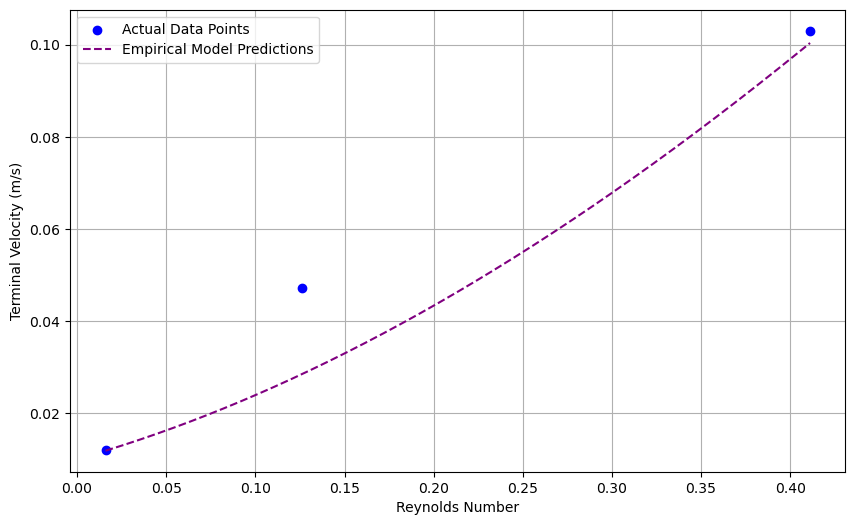

In [99]:
# Select the last three data points for large Reynolds numbers comparison
small_Re_data_empirical = df.head(3)

# Range of data
data_range = np.linspace(small_Re_data_empirical['Reynolds'].min(), small_Re_data_empirical['Reynolds'].max(), 500)
diameter_range_new = np.linspace(
    small_Re_data_empirical["diameter [m]"].min(),
    small_Re_data_empirical["diameter [m]"].max(),
    500,
)
diameter_range_new = pd.Series(diameter_range_new)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(small_Re_data_empirical['Reynolds'], small_Re_data_empirical['velocity [m/sec]'], color='blue', label='Actual Data Points')
plt.plot(data_range, diameter_range_new.apply(
    lambda d: fsolve(force_balance, 0.1, args=(d, RHO_AIR, RHO_WATER, g))[0]
), color='purple', label='Empirical Model Predictions', linestyle="--")
# plt.plot(D_range, np.sqrt(v_squared_predicted), color='red', label=f'Fitted Equation (k2 = {k2:.4f})')
# plt.xscale('log')  # Using alogarithmic scale for the x-axis since Reynolds numbers can span several orders of magnitude
plt.xlabel('Reynolds Number')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/small_comparison_empirical_model.png")
plt.show()

In [ ]:
# Select the last three data points for large Reynolds numbers comparison
small_Re_data_empirical = df.head(3)

# Range of data
data_range = np.linspace(small_Re_data_empirical['Reynolds'].min(), small_Re_data_empirical['Reynolds'].max(), 500)
diameter_range_new = np.linspace(
    small_Re_data_empirical["diameter [m]"].min(),
    small_Re_data_empirical["diameter [m]"].max(),
    500,
)
diameter_range_new = pd.Series(diameter_range_new)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(small_Re_data_empirical['Reynolds'], small_Re_data_empirical['velocity [m/sec]'], color='blue', label='Actual Data Points')
plt.plot(data_range, diameter_range_new.apply(
    lambda d: fsolve(force_balance, 0.1, args=(d, RHO_AIR, RHO_WATER, g))[0]
), color='purple', label='Empirical Model Predictions', linestyle="--")
# plt.plot(D_range, np.sqrt(v_squared_predicted), color='red', label=f'Fitted Equation (k2 = {k2:.4f})')
# plt.xscale('log')  # Using alogarithmic scale for the x-axis since Reynolds numbers can span several orders of magnitude
plt.xlabel('Reynolds Number')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.savefig("plots/small_comparison_empirical_model.png")
plt.show()

In [100]:
df.to_csv("data/completed_data.csv")

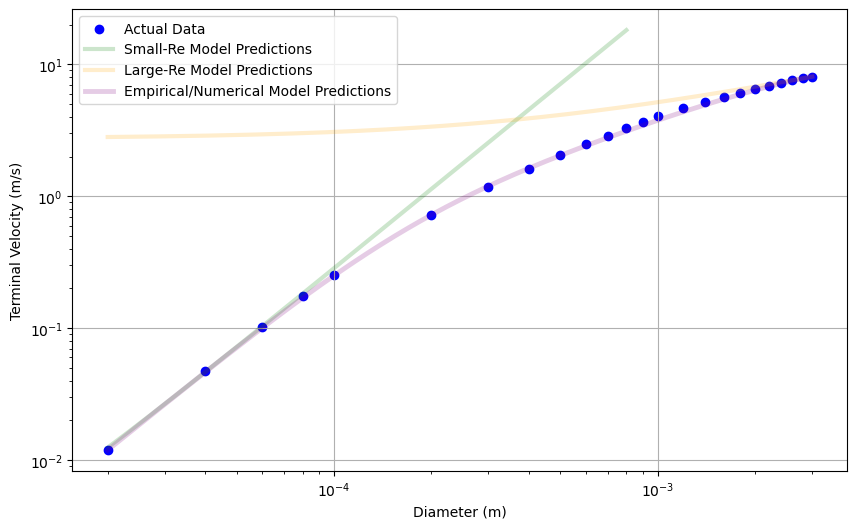

In [135]:
# Small Reynolds number regression (using square of diameter)
small_Re_data = df.head(3)
X_small = (small_Re_data['diameter [m]']) ** 2
y_small = small_Re_data['velocity [m/sec]']
X_small_reshaped = X_small.values.reshape(-1, 1)
model1 = LinearRegression()
model1.fit(X_small_reshaped, y_small)

# Large Reynolds number regression (using square of velocity)
large_Re_data = df.tail(3)
X_large = large_Re_data['diameter [m]']
y_large = (large_Re_data['velocity [m/sec]']) ** 2
X_large_reshaped = X_large.values.reshape(-1, 1)
model2 = LinearRegression()
model2.fit(X_large_reshaped, y_large)

df_small = df[df["diameter [m]"] <= df["diameter [m]"].median()]
df_large = df[df["Reynolds"] >= df["diameter [m]"].median()]

# Predictions for Small Reynolds numbers
small_values = np.linspace(df_small["diameter [m]"].min(), df_small["diameter [m]"].max(), 1000)
small_predictions = model1.predict(small_values.reshape(-1, 1) ** 2)

# Predictions for Large Reynolds numbers
large_values = np.linspace(df_large["diameter [m]"].min(), df_large["diameter [m]"].max(), 1000)
large_predictions = np.sqrt(np.abs(model2.predict(large_values.reshape(-1, 1))))

# Empirical predictions across a range of diameters
diameter_range = np.linspace(df['diameter [m]'].min(), df['diameter [m]'].max(), 1000)
empirical_predictions = [fsolve(force_balance, 0.1, args=(d, RHO_AIR, RHO_WATER, g))[0] for d in diameter_range]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the terminal velocity data
plt.scatter(df['diameter [m]'], df['velocity [m/sec]'], color='blue', label='Actual Data')

# Plot the small-Re predictions
plt.plot(small_values, small_predictions, color="green", label="Small-Re Model Predictions", lw=3, alpha=0.2)

# Plot the large-Re predictions
plt.plot(large_values, large_predictions, color="orange", label="Large-Re Model Predictions", lw=3, alpha=0.2)

# Plot the empirical/numerical predictions as a line
plt.plot(diameter_range, empirical_predictions, color='purple', label='Empirical/Numerical Model Predictions', lw=3.5, alpha=0.2)

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Labeling
plt.xlabel('Diameter (m)')
plt.ylabel('Terminal Velocity (m/s)')
# plt.title('Terminal Velocity vs Diameter (Log/Log Plot)')
plt.legend()
plt.grid(True)
plt.savefig("plots/log-log.png")
plt.show()